### Run basic `scanpy` QC and doublet detection with `scrublet` for **PBMC Tuberculosis** _Cai Y et al 2020_

**Objective**: Review QC process and suggest changes


- **Developed by**: Carlos Talavera-López PhD
- **Modified by**: Mairi McClean
- **Computational Health Centre - Helmholtz Munich**
- v221116

### Load required modules

In [1]:
import anndata
import logging
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sb
import scrublet as scr
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 9.2.0
appnope             0.1.3
asttokens           NA
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
cffi                1.15.1
colorama            0.4.6
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.3
decorator           5.1.1
entrypoints         0.4
executing           1.1.1
h5py                3.7.0
hypergeom_ufunc     NA
ipykernel           6.16.2
jedi                0.18.1
joblib              1.2.0
kiwisolver          1.4.4
llvmlite            0.39.1
matplotlib          3.6.1
mpl_toolkits        NA
natsort             8.2.0
nbinom_ufunc        NA
ncf_ufunc           NA
numba               0.56.3
numpy               1.23.4
packaging           21.3
pandas              1.5.1
parso               0.8.3
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
prompt_toolkit      3.0.31
psutil              5.9.3
ptyprocess  

### Read datasets

In [28]:
adata = sc.read_h5ad('/Users/mairi.mcclean/github/data/tb_pbmc_datasets/CaiY2020_PBMC_TB.raw.h5ad')
adata

AnnData object with n_obs × n_vars = 3701271 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch'
    var: 'gene_name'

In [29]:
adata.var

,gene_name
gene_id,
ENSG00000223972.5,DDX11L1
ENSG00000227232.5,WASH7P
ENSG00000278267.1,MIR6859-1
ENSG00000243485.5,MIR1302-2HG
ENSG00000284332.1,MIR1302-2
...,...
ENSG00000198695.2,MT-ND6
ENSG00000210194.1,MT-TE
ENSG00000198727.2,MT-CYB


In [30]:
adata.obs

,study,individual,sample,tissue,donor,age,gender,status,data_type,centre,version,batch
barcode,,,,,,,,,,,,
AAACCTGAGAAACGAG-acTB3,CaiY_2021,SAMN14048025,PBMC_TB_3,PBMC,SAMN14048025,34,male,active_TB,scRNAseq,Shenzhen University,10XV2,acTB3
AAACCTGAGAAACGCC-acTB3,CaiY_2021,SAMN14048025,PBMC_TB_3,PBMC,SAMN14048025,34,male,active_TB,scRNAseq,Shenzhen University,10XV2,acTB3
AAACCTGAGAACAACT-acTB3,CaiY_2021,SAMN14048025,PBMC_TB_3,PBMC,SAMN14048025,34,male,active_TB,scRNAseq,Shenzhen University,10XV2,acTB3
AAACCTGAGAACAATC-acTB3,CaiY_2021,SAMN14048025,PBMC_TB_3,PBMC,SAMN14048025,34,male,active_TB,scRNAseq,Shenzhen University,10XV2,acTB3
AAACCTGAGAACTGTA-acTB3,CaiY_2021,SAMN14048025,PBMC_TB_3,PBMC,SAMN14048025,34,male,active_TB,scRNAseq,Shenzhen University,10XV2,acTB3
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCTTGTTTG-H1,CaiY_2021,SAMN14048019,PBMC_HC_1,PBMC,SAMN14048019,26,male,Healthy,scRNAseq,Shenzhen University,10XV2,H1
TTTGTCATCTTTACAC-H1,CaiY_2021,SAMN14048019,PBMC_HC_1,PBMC,SAMN14048019,26,male,Healthy,scRNAseq,Shenzhen University,10XV2,H1
TTTGTCATCTTTACGT-H1,CaiY_2021,SAMN14048019,PBMC_HC_1,PBMC,SAMN14048019,26,male,Healthy,scRNAseq,Shenzhen University,10XV2,H1


In [31]:
# checks the number of molecules counted per barcode(?), using "donor" as proxy(?)
adata.obs['donor'].value_counts()

SAMN14048024    619020
SAMN14048021    551750
SAMN14048022    531457
SAMN14048020    524019
SAMN14048019    519223
SAMN14048023    490097
SAMN14048025    465705
Name: donor, dtype: int64

In [32]:
adata.obs['data_type'].values

['scRNAseq', 'scRNAseq', 'scRNAseq', 'scRNAseq', 'scRNAseq', ..., 'scRNAseq', 'scRNAseq', 'scRNAseq', 'scRNAseq', 'scRNAseq']
Length: 3701271
Categories (1, object): ['scRNAseq']

Does this not mean that only scRNAseq data was included?

In [35]:
adata.var_names_make_unique()
sample_object = adata.copy()
sample_object

AnnData object with n_obs × n_vars = 3701271 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch'
    var: 'gene_name'

### Replace gene symbols 

#### Performed to ensure that concatenation of the indexes is smoother

In [36]:
sample_object.var['gene_id'] = sample_object.var.index.copy()
sample_object.var.set_index('gene_name', inplace = True)
sample_object.var.head()

,gene_id
gene_name,
DDX11L1,ENSG00000223972.5
WASH7P,ENSG00000227232.5
MIR6859-1,ENSG00000278267.1
MIR1302-2HG,ENSG00000243485.5
MIR1302-2,ENSG00000284332.1


In [37]:
sample_object.var_names = [str(i) for i in sample_object.var_names]
sample_object.var_names_make_unique()


/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


### Inital scatterplot of top 20

normalizing counts per cell


/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


    finished (0:00:01)


/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


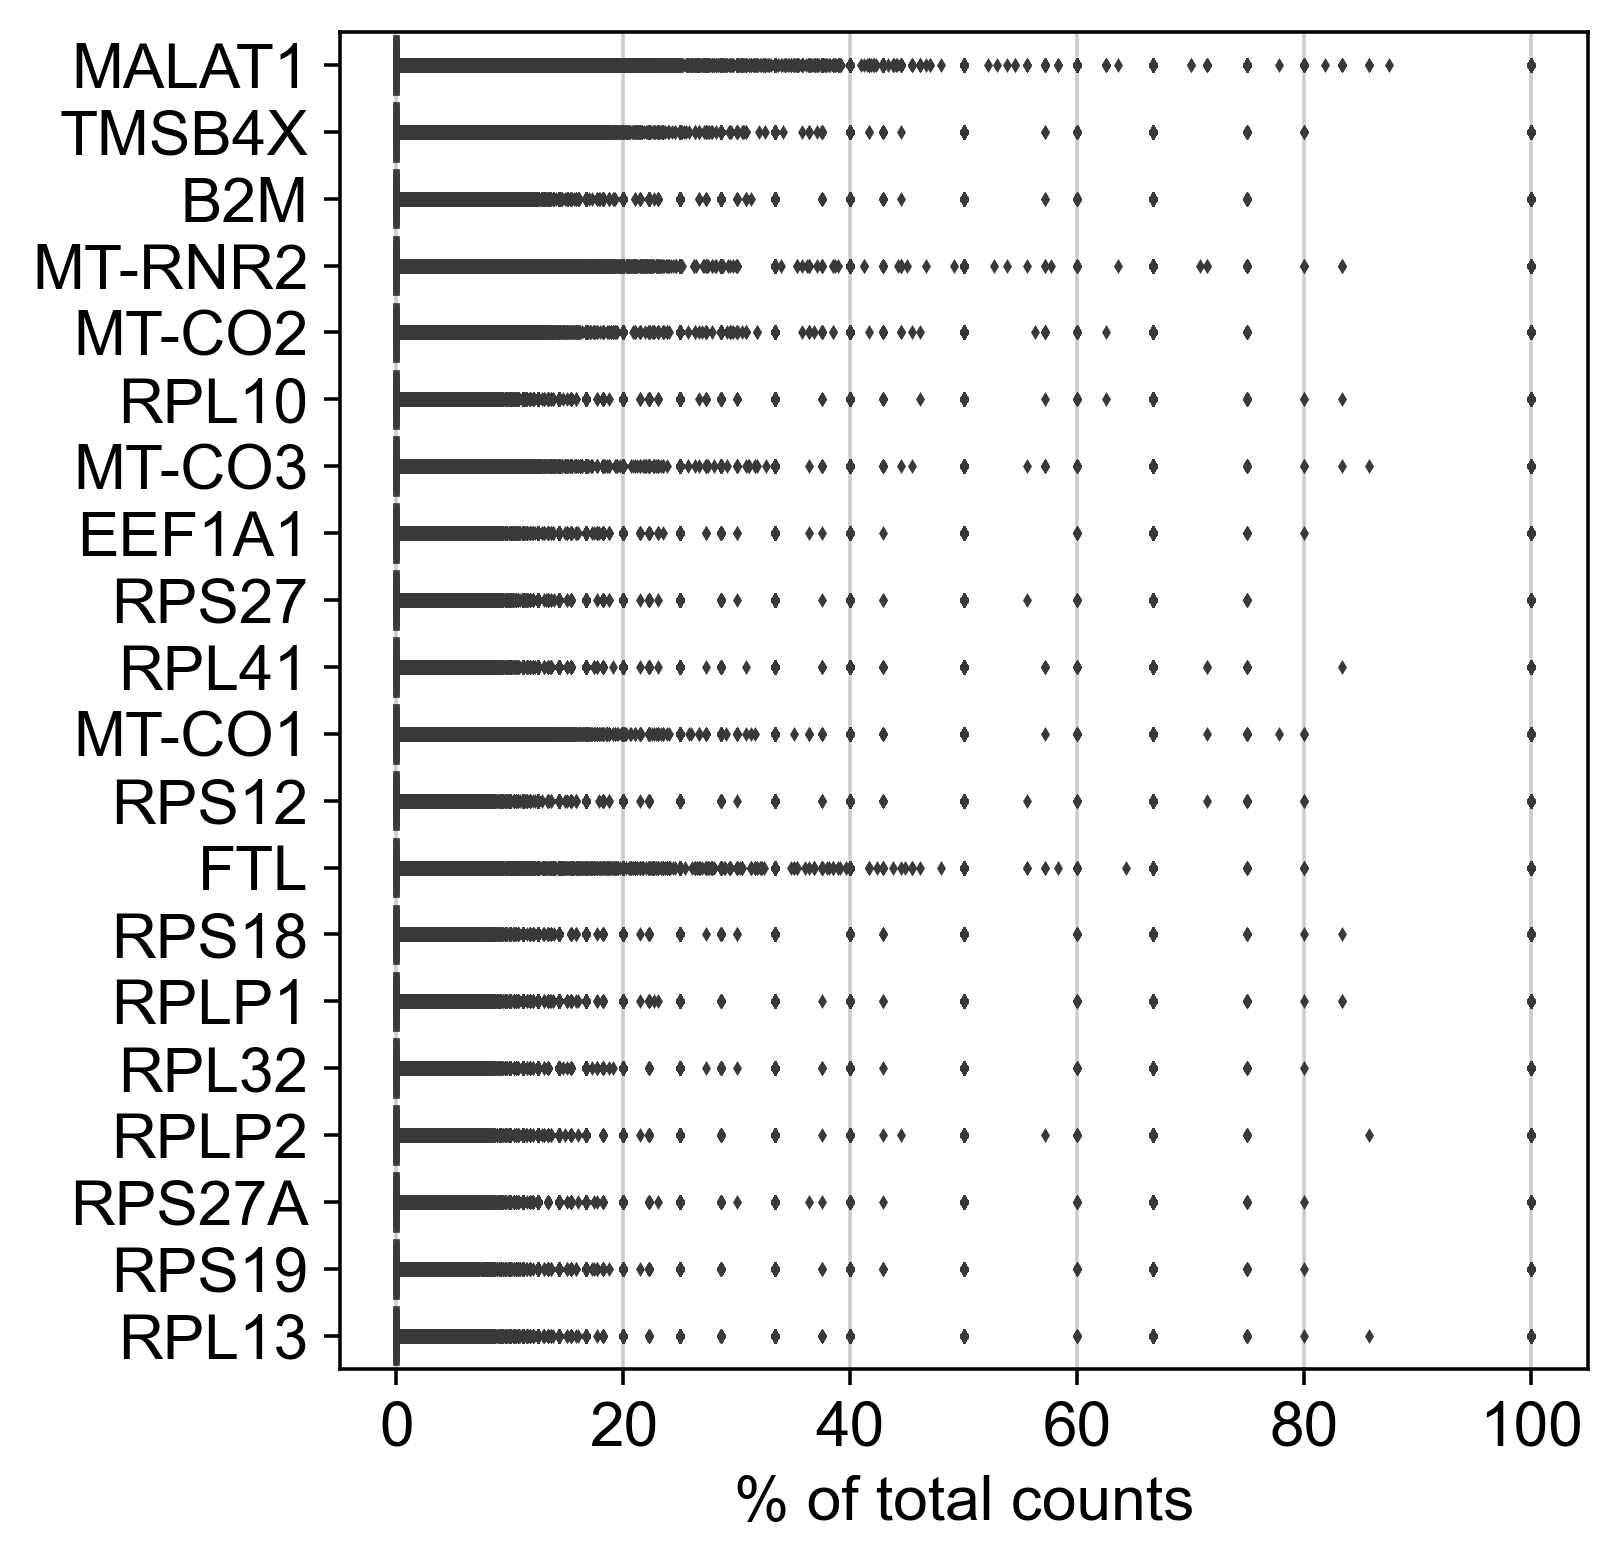

In [38]:
# highest fraction of counts per cell

sc.pl.highest_expr_genes(sample_object, n_top=20)

### Filter cells with less than 200 genes

In [39]:
sc.pp.filter_cells(sample_object, min_genes = 200)
print(sample_object.n_obs, sample_object.n_vars)

filtered out 3628125 cells that have less than 200 genes expressed
73146 61533


In [40]:
sample_object.shape

(73146, 61533)

In [17]:
sample_object.var

,gene_name
gene_id,
ENSG00000223972.5,DDX11L1
ENSG00000227232.5,WASH7P
ENSG00000278267.1,MIR6859-1
ENSG00000243485.5,MIR1302-2HG
ENSG00000284332.1,MIR1302-2
...,...
ENSG00000198695.2,MT-ND6
ENSG00000210194.1,MT-TE
ENSG00000198727.2,MT-CYB


### Filter genes in less than 5 cells


In [41]:
# Parameters (cells=3) taken from scanpy tutorial; others say 5? Will revisit
sc.pp.filter_genes(adata, min_cells=3)

filtered out 24111 genes that are detected in less than 3 cells


### Compute QC stats

#### Remove mt genes

In [21]:
sample_object.shape

(73146, 61533)

In [42]:
sample_object.var['mt'] = sample_object.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(sample_object, qc_vars = ['mt'], percent_top = None, log1p = False, inplace = True)
sample_object.var

,gene_id,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
DDX11L1,ENSG00000223972.5,False,6,0.000082,99.991797,6.0
WASH7P,ENSG00000227232.5,False,1,0.000014,99.998633,1.0
MIR6859-1,ENSG00000278267.1,False,0,0.000000,100.000000,0.0
MIR1302-2HG,ENSG00000243485.5,False,0,0.000000,100.000000,0.0
MIR1302-2,ENSG00000284332.1,False,0,0.000000,100.000000,0.0
...,...,...,...,...,...,...
MT-ND6,ENSG00000198695.2,True,10818,0.183059,85.210401,13390.0
MT-TE,ENSG00000210194.1,True,626,0.008627,99.144177,631.0
MT-CYB,ENSG00000198727.2,True,70927,9.182444,3.033659,671659.0
MT-TT,ENSG00000210195.2,True,228,0.003144,99.688295,230.0


#### Remove ribosomal RNA

###### When would you not remove ribosomal RNA?

In [ ]:
sample_object.var['ribo'] = sample_object.var_names.str.startswith(("RPS","RPL"))

In [ ]:
sc.pp.calculate_qc_metrics(sample_object, qc_vars = ['ribo'], percent_top = None, log1p = False, inplace = True)

In [24]:
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
# add the total counts per cell as observations-annotation to adata

mito_genes = sample_object.var_names.str.startswith('MT-')
sample_object.obs['percent_mt2'] = np.sum(
    sample_object[:, mito_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1
sample_object.obs['n_counts'] = sample_object.X.sum(axis = 1).A1

In [25]:
sample_object

AnnData object with n_obs × n_vars = 73146 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

### Ambient RNA expression

> https://www.10xgenomics.com/cn/resources/analysis-guides/background-removal-guidance-for-single-cell-gene-expression-datasets-using-third-party-tools

Process run on terminal? 

15:47 221116: Finished install; need to run on terminal

### Visualise QC metrics


In [ ]:
sample_object.var_names

In [ ]:
sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo'],
             jitter = 0.2, groupby = 'donor', rotation = 45)

In [ ]:
sc.pl.scatter(sample_object, x = 'total_counts', y = 'pct_counts_mt', color = "donor")

In [ ]:
sc.pl.scatter(sample_object, x='total_counts', y='n_genes_by_counts', color = "donor")

### Add sample sex covariate

In [ ]:
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("external_gene_name")

In [ ]:
annot.head()

In [ ]:
chrY_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrY_genes

In [ ]:
sample_object.obs['percent_chrY'] = np.sum(
    sample_object[:, chrY_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1 * 100

In [ ]:
sample_object.obs["XIST-counts"] = sample_object.X[:,sample_object.var_names.str.match('XIST')].toarray()

sc.pl.scatter(sample_object, x = 'XIST-counts', y = 'percent_chrY', color = "donor")

In [ ]:
sc.pl.violin(sample_object, ["XIST-counts", "percent_chrY"], jitter = 0.4, groupby = 'donor', rotation = 45)

### Calculate cell cycle scores

In [ ]:
!if [ ! -f /home/cartalop/refseq/gene_lists/regev_lab_cell_cycle_genes.txt ]; then curl -o /home/cartalop/refseq/gene_lists/regev_lab_cell_cycle_genes.txt https://raw.githubusercontent.com/theislab/scanpy_usage/master/180209_cell_cycle/data/regev_lab_cell_cycle_genes.txt; fi

In [ ]:
cell_cycle_genes = [x.strip() for x in open('/home/cartalop/refseq/gene_lists/regev_lab_cell_cycle_genes.txt')]
print(len(cell_cycle_genes))

# Split into 2 lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

cell_cycle_genes = [x for x in cell_cycle_genes if x in sample_object.var_names]
print(len(cell_cycle_genes))

- Create basic `anndata` for score calculation

In [ ]:
adata_log = anndata.AnnData(X = sample_object.X,  var = sample_object.var, obs = sample_object.obs)
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)

In [ ]:
sc.tl.score_genes_cell_cycle(adata_log, s_genes = s_genes, g2m_genes = g2m_genes)
sc.pl.violin(adata_log, ['S_score', 'G2M_score'],
             jitter = 0.4, groupby = 'donor', rotation = 45)

In [ ]:
sample_object.obs['S_score'] = adata_log.obs['S_score']
sample_object.obs['G2M_score'] = adata_log.obs['G2M_score']
sample_object

### Predict doublets

In [ ]:
scrub = scr.Scrublet(sample_object.X)
sample_object.obs['doublet_scores'], sample_object.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

sum(sample_object.obs['predicted_doublets'])

In [ ]:
sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo', 'predicted_doublets'],
             jitter = 0.2, groupby = 'donor', rotation = 45)

In [ ]:
sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo', 'predicted_doublets'],
             jitter = 0.2, groupby = 'sample', rotation = 45)

### Prepare counts for individual slots

Preparation for data normalization

>> not QC

In [ ]:
sample_object.raw = sample_object.copy()
sample_object.layers['counts'] = sample_object.X.copy()
sample_object.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(sample_object, inplace = False)["X"]
)
sample_object

### Export object

In [ ]:
sample_object.write('/home/cartalop/data/single_cell/lung/tb/caiy2020/CaiY2020_PBMC_TB_QCed_pre-process_ctl221014.h5ad')